In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from time import time

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
train_data= pd.read_csv('clean2_data.csv', parse_dates = ['order_date'])
train_data

,order_date,sales_region_code,item_code,ord_qty
0,2015-09-02,101,20657,18
1,2015-09-02,102,20323,502
2,2015-09-02,102,20457,308
3,2015-09-02,102,21350,107
4,2015-09-03,102,20008,44
...,...,...,...,...
257033,2018-12-20,105,22006,10
257034,2018-12-20,105,22028,7
257035,2018-12-20,105,22058,56
257036,2018-12-20,105,22072,248


In [5]:
test_data= pd.read_csv('your_data_with_predictions.csv', parse_dates = ['order_date'])
test_data

,id,order_date,sales_region_code,item_code
0,0,2019-01-01,101,20002
1,1,2019-01-02,101,20002
2,2,2019-01-03,101,20002
3,3,2019-01-04,101,20002
4,4,2019-01-05,101,20002
...,...,...,...,...
196825,196825,2019-03-27,105,22084
196826,196826,2019-03-28,105,22084
196827,196827,2019-03-29,105,22084
196828,196828,2019-03-30,105,22084


In [6]:
data= pd.concat([train_data, test_data],sort= False)
data

,order_date,sales_region_code,item_code,ord_qty,id
0,2015-09-02,101,20657,18.0,NaN
1,2015-09-02,102,20323,502.0,NaN
2,2015-09-02,102,20457,308.0,NaN
3,2015-09-02,102,21350,107.0,NaN
4,2015-09-03,102,20008,44.0,NaN
...,...,...,...,...,...
196825,2019-03-27,105,22084,NaN,196825.0
196826,2019-03-28,105,22084,NaN,196826.0
196827,2019-03-29,105,22084,NaN,196827.0
196828,2019-03-30,105,22084,NaN,196828.0


In [7]:
sub_file= pd.read_csv('ample_submission.csv')

In [8]:
data.shape

(453868, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453868 entries, 0 to 196829
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   order_date         453868 non-null  datetime64[ns]
 1   sales_region_code  453868 non-null  int64         
 2   item_code          453868 non-null  int64         
 3   ord_qty            257038 non-null  float64       
 4   id                 196830 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 20.8 MB


There are null values, because test data has not sales values and train data has not id values, and no duplicate row:

In [10]:
data.isnull().sum()

order_date                0
sales_region_code         0
item_code                 0
ord_qty              196830
id                   257038
dtype: int64

In [11]:
data[data.duplicated()]

,order_date,sales_region_code,item_code,ord_qty,id


10 stores and 50 items:

In [12]:
data['sales_region_code'].unique()

array([101, 102, 103, 105], dtype=int64)

In [13]:
data['item_code'].unique()

array([20657, 20323, 20457, 21350, 20008, 20020, 20459, 20717, 20797,
       21003, 21271, 21347, 21379, 21644, 21745, 21920, 22035, 22046,
       20230, 20285, 20483, 20498, 20502, 20656, 20662, 20973, 20996,
       21239, 21297, 21484, 21533, 21601, 21703, 22047, 20189, 20271,
       20283, 20859, 20916, 21381, 20608, 21412, 21619, 21819, 21562,
       22082, 20092, 20226, 20576, 20584, 20712, 20810, 20912, 21739,
       21830, 20140, 20247, 20780, 20855, 21028, 21057, 21121, 21579,
       21659, 20620, 21690, 20413, 20342, 21583, 21982, 21279, 21442,
       21657, 21026, 21053, 21373, 21913, 20327, 20964, 21555, 21274,
       20445, 20139, 20589, 20694, 20988, 21542, 21764, 21517, 20392,
       21881, 21293, 20702, 21409, 21511, 21518, 20556, 21113, 21371,
       21306, 21789, 21461, 20433, 20573, 20900, 21888, 20368, 20637,
       20248, 21068, 21850, 21001, 20545, 20743, 20653, 20152, 20135,
       20134, 20408, 21039, 20276, 21449, 20155, 21418, 20528, 20846,
       20305, 20351,

In [14]:
data.groupby(["sales_region_code"]).agg({"ord_qty": ["count","sum", "mean", "median", "std", "min", "max"]})

ord_qty                                                  \
                    count         sum        mean median         std  min   
sales_region_code                                                           
101                 60651  10222665.0  168.548993   52.0  386.151314  1.0   
102                 69207  11125735.0  160.760255   55.0  298.549789  1.0   
103                 51498   9177589.0  178.212533   53.0  373.158653  1.0   
105                 75682  11282987.0  149.084155   43.0  313.909793  1.0   

                            
                       max  
sales_region_code           
101                21090.0  
102                 6086.0  
103                10598.0  
105                17162.0

In [15]:
data.groupby(["item_code"]).agg({"ord_qty": ["count","sum", "mean", "median", "std", "min", "max"]})

ord_qty                                                      
            count       sum        mean median         std  min     max
item_code                                                              
20002         462    8992.0   19.463203   11.0   31.208169  2.0   382.0
20003         931  219664.0  235.944146  130.0  296.539959  1.0  2585.0
20006         633   60622.0   95.769352   50.0  145.834614  2.0  1391.0
20008         311   14651.0   47.109325   31.0   43.855933  2.0   287.0
20014         760  244414.0  321.597368  178.0  418.034161  2.0  4217.0
...           ...       ...         ...    ...         ...  ...     ...
22072          46    3762.0   81.782609   61.5   80.566581  3.0   328.0
22081         617   25132.0   40.732577   21.0   49.735320  1.0   324.0
22082          30     646.0   21.533333   14.5   20.727682  3.0   105.0
22083         206   53242.0  258.456311   49.5  410.687140  2.0  2223.0
22084         351   11595.0   33.034188   11.0   56.872830  2.0   535.0

[849 rows x 7 columns]

In [16]:
data.groupby(['sales_region_code'])['item_code'].nunique()

sales_region_code
101    557
102    537
103    522
105    571
Name: item_code, dtype: int64

In [17]:
data.groupby(["sales_region_code"]).agg({"ord_qty": ["sum"]})

,ord_qty
,sum
sales_region_code,
101,10222665.0
102,11125735.0
103,9177589.0
105,11282987.0


In [18]:
data.groupby(['sales_region_code','item_code']).agg({'ord_qty':[ 'sum', 'mean', 'median', 'std']})

ord_qty                               
                                 sum        mean median         std
sales_region_code item_code                                        
101               20002        593.0   10.224138    8.0    6.923246
                  20003      10416.0  102.117647   69.5  107.493246
                  20006       3902.0   49.392405   38.0   46.524991
                  20014      80826.0  436.897297  273.0  526.850378
                  20016      37422.0  146.752941  102.0  161.461014
...                              ...         ...    ...         ...
105               22059        296.0    9.548387    9.0    5.214331
                  22066      48293.0  335.368056  198.0  418.330460
                  22072       3762.0   81.782609   61.5   80.566581
                  22083      13782.0  112.967213   14.0  295.909745
                  22084        439.0   16.884615    9.0   27.642470

[2187 rows x 4 columns]

In [19]:
train_data.order_date.nunique()

1170

In [20]:
indexes_train = []

In [21]:
# 计算唯一组合的数量
num_combinations = len(train_data.groupby(['sales_region_code', 'item_code']))

# 生成索引数组
indexes_train = np.array([])
for combination in train_data.groupby(['sales_region_code', 'item_code']):
    dates = combination[1]["order_date"].unique()
    index_values = np.linspace(0, len(dates)-1, len(dates), dtype=int)
    indexes_train = np.append(indexes_train, index_values)

# 将索引数组添加到数据框中
train_data["indexes"] = indexes_train

In [22]:
indexes_train.shape

(257038,)

In [23]:
train_data["indexes"]=indexes_train
train_data

,order_date,sales_region_code,item_code,ord_qty,indexes
0,2015-09-02,101,20657,18,0.0
1,2015-09-02,102,20323,502,1.0
2,2015-09-02,102,20457,308,2.0
3,2015-09-02,102,21350,107,3.0
4,2015-09-03,102,20008,44,4.0
...,...,...,...,...,...
257033,2018-12-20,105,22006,10,21.0
257034,2018-12-20,105,22028,7,22.0
257035,2018-12-20,105,22058,56,23.0
257036,2018-12-20,105,22072,248,24.0


In [24]:
indexes_test = []

In [25]:
# 计算唯一组合的数量
num_combinations = len(test_data.groupby(['sales_region_code', 'item_code']))

# 生成索引数组
indexes_test = np.array([])
for combination in test_data.groupby(['sales_region_code', 'item_code']):
    dates = combination[1]["order_date"].unique()
    index_values = np.linspace(0, len(dates)-1, len(dates), dtype=int)
    indexes_test = np.append(indexes_test, index_values)

# 将索引数组添加到数据框中
test_data["indexes"] = indexes_test

In [26]:
indexes_test.shape

(196830,)

In [27]:
test_data["indexes"]=indexes_test
test_data

,id,order_date,sales_region_code,item_code,indexes
0,0,2019-01-01,101,20002,0.0
1,1,2019-01-02,101,20002,1.0
2,2,2019-01-03,101,20002,2.0
3,3,2019-01-04,101,20002,3.0
4,4,2019-01-05,101,20002,4.0
...,...,...,...,...,...
196825,196825,2019-03-27,105,22084,85.0
196826,196826,2019-03-28,105,22084,86.0
196827,196827,2019-03-29,105,22084,87.0
196828,196828,2019-03-30,105,22084,88.0


In [28]:
data= pd.concat([train_data, test_data], sort= False)
data

,order_date,sales_region_code,item_code,ord_qty,indexes,id
0,2015-09-02,101,20657,18.0,0.0,NaN
1,2015-09-02,102,20323,502.0,1.0,NaN
2,2015-09-02,102,20457,308.0,2.0,NaN
3,2015-09-02,102,21350,107.0,3.0,NaN
4,2015-09-03,102,20008,44.0,4.0,NaN
...,...,...,...,...,...,...
196825,2019-03-27,105,22084,NaN,85.0,196825.0
196826,2019-03-28,105,22084,NaN,86.0,196826.0
196827,2019-03-29,105,22084,NaN,87.0,196827.0
196828,2019-03-30,105,22084,NaN,88.0,196828.0


In [29]:
hour = 60*60 # 1 hour 60*60 seconds...
day  = 24*hour
week = 7*day
year = 365.2425*day

In [30]:
df1=data.copy()

In [31]:
df1["index_second"]= df1["indexes"]*day #seconds difference compared to the first day
df1

,order_date,sales_region_code,item_code,ord_qty,indexes,id,index_second
0,2015-09-02,101,20657,18.0,0.0,NaN,0.0
1,2015-09-02,102,20323,502.0,1.0,NaN,86400.0
2,2015-09-02,102,20457,308.0,2.0,NaN,172800.0
3,2015-09-02,102,21350,107.0,3.0,NaN,259200.0
4,2015-09-03,102,20008,44.0,4.0,NaN,345600.0
...,...,...,...,...,...,...,...
196825,2019-03-27,105,22084,NaN,85.0,196825.0,7344000.0
196826,2019-03-28,105,22084,NaN,86.0,196826.0,7430400.0
196827,2019-03-29,105,22084,NaN,87.0,196827.0,7516800.0
196828,2019-03-30,105,22084,NaN,88.0,196828.0,7603200.0


In [32]:
df1["YEAR_index_norm"] = 2 * np.pi * df1["index_second"] / year
df1["YEAR_cos_index"] = np.cos(df1["YEAR_index_norm"])
df1["YEAR_sin_index"] = np.sin(df1["YEAR_index_norm"])
df1

,order_date,sales_region_code,item_code,ord_qty,indexes,id,index_second,YEAR_index_norm,YEAR_cos_index,YEAR_sin_index
0,2015-09-02,101,20657,18.0,0.0,NaN,0.0,0.000000,1.000000,0.000000
1,2015-09-02,102,20323,502.0,1.0,NaN,86400.0,0.017203,0.999852,0.017202
2,2015-09-02,102,20457,308.0,2.0,NaN,172800.0,0.034406,0.999408,0.034399
3,2015-09-02,102,21350,107.0,3.0,NaN,259200.0,0.051608,0.998669,0.051585
4,2015-09-03,102,20008,44.0,4.0,NaN,345600.0,0.068811,0.997633,0.068757
...,...,...,...,...,...,...,...,...,...,...
196825,2019-03-27,105,22084,NaN,85.0,196825.0,7344000.0,1.462236,0.108347,0.994113
196826,2019-03-28,105,22084,NaN,86.0,196826.0,7430400.0,1.479439,0.091230,0.995830
196827,2019-03-29,105,22084,NaN,87.0,196827.0,7516800.0,1.496642,0.074087,0.997252
196828,2019-03-30,105,22084,NaN,88.0,196828.0,7603200.0,1.513844,0.056921,0.998379


In [35]:
df2 = df1.drop(["indexes","index_second","YEAR_index_norm"], axis=1) #lets remove unnecessary features
df2.head()

,order_date,sales_region_code,item_code,ord_qty,id,YEAR_cos_index,YEAR_sin_index
0,2015-09-02,101,20657,18.0,NaN,1.000000,0.000000
1,2015-09-02,102,20323,502.0,NaN,0.999852,0.017202
2,2015-09-02,102,20457,308.0,NaN,0.999408,0.034399
3,2015-09-02,102,21350,107.0,NaN,0.998669,0.051585
4,2015-09-03,102,20008,44.0,NaN,0.997633,0.068757


In [36]:
def create_date_time_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    #df['hour'] = df.index.hour
    df['dayofweek'] = df.order_date.dt.dayofweek
    df['quarter'] = df.order_date.dt.quarter
    df['month'] = df.order_date.dt.month
    df['year'] = df.order_date.dt.year
    df['dayofyear'] = df.order_date.dt.dayofyear
    df['dayofmonth'] = df.order_date.dt.day
    df['weekofyear'] = df.order_date.dt.isocalendar().week.astype("int64")
    # 0: Winter - 1: Spring - 2: Summer - 3: Fall
    df["season"] = np.where(df.month.isin([12,1,2]), 0, 1)
    df["season"] = np.where(df.month.isin([6,7,8]), 2, df["season"])
    df["season"] = np.where(df.month.isin([9, 10, 11]), 3, df["season"])
    return df

In [37]:
df3 = df2.copy()

In [38]:
df3= create_date_time_features(df3)
df3

,order_date,sales_region_code,item_code,ord_qty,id,YEAR_cos_index,YEAR_sin_index,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,season
0,2015-09-02,101,20657,18.0,NaN,1.000000,0.000000,2,3,9,2015,245,2,36,3
1,2015-09-02,102,20323,502.0,NaN,0.999852,0.017202,2,3,9,2015,245,2,36,3
2,2015-09-02,102,20457,308.0,NaN,0.999408,0.034399,2,3,9,2015,245,2,36,3
3,2015-09-02,102,21350,107.0,NaN,0.998669,0.051585,2,3,9,2015,245,2,36,3
4,2015-09-03,102,20008,44.0,NaN,0.997633,0.068757,3,3,9,2015,246,3,36,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196825,2019-03-27,105,22084,NaN,196825.0,0.108347,0.994113,2,1,3,2019,86,27,13,1
196826,2019-03-28,105,22084,NaN,196826.0,0.091230,0.995830,3,1,3,2019,87,28,13,1
196827,2019-03-29,105,22084,NaN,196827.0,0.074087,0.997252,4,1,3,2019,88,29,13,1
196828,2019-03-30,105,22084,NaN,196828.0,0.056921,0.998379,5,1,3,2019,89,30,13,1


In [39]:
df4= df3.copy()

In [40]:
def lag_features(df, lags):
    for lag in lags:
        df['ord_qty_lag_' + str(lag)] = df.groupby(["sales_region_code", "item_code"])['ord_qty'].transform(lambda x: x.shift(lag))
        df.fillna(0, inplace=True)
    return df

In [41]:
lag_features(df4, [91, 98, 105, 112, 119, 126, 182, 364, 546, 728])
df4

,order_date,sales_region_code,item_code,ord_qty,id,YEAR_cos_index,YEAR_sin_index,dayofweek,quarter,month,...,ord_qty_lag_91,ord_qty_lag_98,ord_qty_lag_105,ord_qty_lag_112,ord_qty_lag_119,ord_qty_lag_126,ord_qty_lag_182,ord_qty_lag_364,ord_qty_lag_546,ord_qty_lag_728
0,2015-09-02,101,20657,18.0,0.0,1.000000,0.000000,2,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-09-02,102,20323,502.0,0.0,0.999852,0.017202,2,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-09-02,102,20457,308.0,0.0,0.999408,0.034399,2,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-09-02,102,21350,107.0,0.0,0.998669,0.051585,2,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-09-03,102,20008,44.0,0.0,0.997633,0.068757,3,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196825,2019-03-27,105,22084,0.0,196825.0,0.108347,0.994113,2,1,3,...,106.0,9.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196826,2019-03-28,105,22084,0.0,196826.0,0.091230,0.995830,3,1,3,...,10.0,6.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
196827,2019-03-29,105,22084,0.0,196827.0,0.074087,0.997252,4,1,3,...,106.0,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
196828,2019-03-30,105,22084,0.0,196828.0,0.056921,0.998379,5,1,3,...,5.0,10.0,10.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
def roll_mean_features(df, windows):
    for window in windows:
        df['ord_qty_roll_mean_' + str(window)] = df.groupby(["sales_region_code", "item_code"])['ord_qty']. \
                                             transform(lambda x: x.shift(1).rolling(window=window, min_periods=10, win_type="triang").mean())
        df.fillna(0, inplace=True)
    return df

In [43]:
df5= df4.copy()

In [44]:
df5= roll_mean_features(df5, [365, 546])
df5

,order_date,sales_region_code,item_code,ord_qty,id,YEAR_cos_index,YEAR_sin_index,dayofweek,quarter,month,...,ord_qty_lag_105,ord_qty_lag_112,ord_qty_lag_119,ord_qty_lag_126,ord_qty_lag_182,ord_qty_lag_364,ord_qty_lag_546,ord_qty_lag_728,ord_qty_roll_mean_365,ord_qty_roll_mean_546
0,2015-09-02,101,20657,18.0,0.0,1.000000,0.000000,2,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,2015-09-02,102,20323,502.0,0.0,0.999852,0.017202,2,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,2015-09-02,102,20457,308.0,0.0,0.999408,0.034399,2,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,2015-09-02,102,21350,107.0,0.0,0.998669,0.051585,2,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,2015-09-03,102,20008,44.0,0.0,0.997633,0.068757,3,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196825,2019-03-27,105,22084,0.0,196825.0,0.108347,0.994113,2,1,3,...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.619048,6.643048
196826,2019-03-28,105,22084,0.0,196826.0,0.091230,0.995830,3,1,3,...,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,6.571271,6.594946
196827,2019-03-29,105,22084,0.0,196827.0,0.074087,0.997252,4,1,3,...,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,6.524142,6.547498
196828,2019-03-30,105,22084,0.0,196828.0,0.056921,0.998379,5,1,3,...,10.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,6.477651,6.500693


In [45]:
def ewm_features(dataframe, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            dataframe['ord_qty_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby(["sales_region_code", "item_code"])['ord_qty'].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    dataframe.fillna(0, inplace=True)
    return dataframe

In [46]:
df6= df5.copy()

In [47]:
alphas = [0.95, 0.9, 0.8, 0.7, 0.5]
lags   = [91, 98, 105, 112, 180, 270, 365, 546, 728]


df6= ewm_features(df6, alphas, lags)

df6.head()

,order_date,sales_region_code,item_code,ord_qty,id,YEAR_cos_index,YEAR_sin_index,dayofweek,quarter,month,...,ord_qty_ewm_alpha_07_lag_728,ord_qty_ewm_alpha_05_lag_91,ord_qty_ewm_alpha_05_lag_98,ord_qty_ewm_alpha_05_lag_105,ord_qty_ewm_alpha_05_lag_112,ord_qty_ewm_alpha_05_lag_180,ord_qty_ewm_alpha_05_lag_270,ord_qty_ewm_alpha_05_lag_365,ord_qty_ewm_alpha_05_lag_546,ord_qty_ewm_alpha_05_lag_728
0,2015-09-02,101,20657,18.0,0.0,1.000000,0.000000,2,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-09-02,102,20323,502.0,0.0,0.999852,0.017202,2,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-09-02,102,20457,308.0,0.0,0.999408,0.034399,2,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-09-02,102,21350,107.0,0.0,0.998669,0.051585,2,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-09-03,102,20008,44.0,0.0,0.997633,0.068757,3,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453868 entries, 0 to 196829
Data columns (total 72 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_date                     453868 non-null  datetime64[ns]
 1   sales_region_code              453868 non-null  int64         
 2   item_code                      453868 non-null  int64         
 3   ord_qty                        453868 non-null  float64       
 4   id                             453868 non-null  float64       
 5   YEAR_cos_index                 453868 non-null  float64       
 6   YEAR_sin_index                 453868 non-null  float64       
 7   dayofweek                      453868 non-null  int64         
 8   quarter                        453868 non-null  int64         
 9   month                          453868 non-null  int64         
 10  year                           453868 non-null  int64         
 11  

In [49]:
df6.shape

(453868, 72)

# One-Hot-Encoding

In [50]:
df7 = pd.get_dummies(df6, columns=['sales_region_code', 'item_code', 'dayofweek', "quarter", 'month', "year", "season"])
df7.shape

(453868, 950)

# Logarithmic Transformation for Sales data

In [51]:
df7['ord_qty']= np.log1p(df7["ord_qty"].values)
df7.head()

,order_date,ord_qty,id,YEAR_cos_index,YEAR_sin_index,dayofyear,dayofmonth,weekofyear,ord_qty_lag_91,ord_qty_lag_98,...,month_12,year_2015,year_2016,year_2017,year_2018,year_2019,season_0,season_1,season_2,season_3
0,2015-09-02,2.944439,0.0,1.000000,0.000000,245,2,36,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,2015-09-02,6.220590,0.0,0.999852,0.017202,245,2,36,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
2,2015-09-02,5.733341,0.0,0.999408,0.034399,245,2,36,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,2015-09-02,4.682131,0.0,0.998669,0.051585,245,2,36,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4,2015-09-03,3.806662,0.0,0.997633,0.068757,246,3,36,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [52]:
df_model= df7.copy()

In [53]:
df_model = df_model.sort_values("order_date").reset_index(drop = True)

In [54]:
train= df_model.loc[(df_model["order_date"] <  "2018-01-01"), :]

val=   df_model.loc[(df_model["order_date"] >= "2018-01-01") & (df_model["order_date"] < "2018-04-01"), :]

In [55]:
train

,order_date,ord_qty,id,YEAR_cos_index,YEAR_sin_index,dayofyear,dayofmonth,weekofyear,ord_qty_lag_91,ord_qty_lag_98,...,month_12,year_2015,year_2016,year_2017,year_2018,year_2019,season_0,season_1,season_2,season_3
0,2015-09-02,2.944439,0.0,1.000000,0.000000,245,2,36,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,2015-09-02,6.220590,0.0,0.999852,0.017202,245,2,36,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
2,2015-09-02,5.733341,0.0,0.999408,0.034399,245,2,36,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,2015-09-02,4.682131,0.0,0.998669,0.051585,245,2,36,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4,2015-09-03,4.488636,0.0,0.947057,0.321064,246,3,36,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131045,2017-12-31,3.583519,0.0,0.498118,0.867109,365,31,52,207.0,102.0,...,1,0,0,1,0,0,1,0,0,0
131046,2017-12-31,6.630683,0.0,0.512960,0.858412,365,31,52,101.0,104.0,...,1,0,0,1,0,0,1,0,0,0
131047,2017-12-31,4.624973,0.0,0.527651,0.849461,365,31,52,263.0,165.0,...,1,0,0,1,0,0,1,0,0,0
131048,2017-12-31,5.493061,0.0,0.542185,0.840259,365,31,52,58.0,1036.0,...,1,0,0,1,0,0,1,0,0,0


In [56]:
val

,order_date,ord_qty,id,YEAR_cos_index,YEAR_sin_index,dayofyear,dayofmonth,weekofyear,ord_qty_lag_91,ord_qty_lag_98,...,month_12,year_2015,year_2016,year_2017,year_2018,year_2019,season_0,season_1,season_2,season_3
131050,2018-01-01,2.944439,0.0,0.690562,0.723273,1,1,1,55.0,20.0,...,0,0,0,0,1,0,1,0,0,0
131051,2018-01-01,4.736198,0.0,0.612365,0.790575,1,1,1,65.0,55.0,...,0,0,0,0,1,0,1,0,0,0
131052,2018-01-01,2.302585,0.0,0.625874,0.779924,1,1,1,0.0,0.0,...,0,0,0,0,1,0,1,0,0,0
131053,2018-01-01,3.555348,0.0,0.639198,0.769042,1,1,1,236.0,474.0,...,0,0,0,0,1,0,1,0,0,0
131054,2018-01-01,3.637586,0.0,0.652332,0.757933,1,1,1,141.0,157.0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157750,2018-03-31,5.755742,0.0,0.138349,-0.990384,90,31,13,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
157751,2018-03-31,2.079442,0.0,0.206117,-0.978527,90,31,13,4.0,145.0,...,0,0,0,0,1,0,0,1,0,0
157752,2018-03-31,3.555348,0.0,0.222919,-0.974837,90,31,13,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
157753,2018-03-31,2.890372,0.0,0.239655,-0.970858,90,31,13,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0


In [57]:
cols = [col for col in train.columns if col not in ['order_date', 'id', "ord_qty", "year"]]

In [58]:
X_train = train[cols]
Y_train = train['ord_qty']

X_val = val[cols]
Y_val = val['ord_qty']

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((131050, 947), (131050,), (26705, 947), (26705,))

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
def RootMeanSquaredError(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))
# from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras import metrics
import tensorflow as tf

Using TensorFlow backend.


In [60]:
NN_model = Sequential()

NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))#The Input Layer

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))#The Hidden Layers
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))#The Hidden Layers
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))#The Hidden Layers

NN_model.add(Dropout(0.2))#Dropout layer

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))#The Output Layer

#Compile the network
NN_model.compile(loss=tf.keras.losses.mae, optimizer="adam", metrics=['mae'])
NN_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               121344    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)      

In [61]:
#Define a checkpoint callback :
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [73]:
#Train the model
history = NN_model.fit(X_train.values, Y_train.values, epochs=50, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 104840 samples, validate on 26210 samples
Epoch 1/50
104736/104840 [============================>.] - ETA: 0s - loss: 0.8823 - mean_absolute_error: 0.8823
Epoch 00001: val_loss did not improve from 1.13411
104840/104840 [==============================] - 16s 156us/sample - loss: 0.8823 - mean_absolute_error: 0.8823 - val_loss: 1.1468 - val_mean_absolute_error: 1.1468
Epoch 2/50
104704/104840 [============================>.] - ETA: 0s - loss: 0.8813 - mean_absolute_error: 0.8813
Epoch 00002: val_loss did not improve from 1.13411
104840/104840 [==============================] - 18s 168us/sample - loss: 0.8813 - mean_absolute_error: 0.8813 - val_loss: 1.1444 - val_mean_absolute_error: 1.1444
Epoch 3/50
104736/104840 [============================>.] - ETA: 0s - loss: 0.8827 - mean_absolute_error: 0.8827
Epoch 00003: val_loss did not improve from 1.13411
104840/104840 [==============================] - 23s 218us/sample - loss: 0.8826 - mean_absolute_error: 0.8826 - val_loss: 1.1573

Epoch 26/50
104704/104840 [============================>.] - ETA: 0s - loss: 0.8765 - mean_absolute_error: 0.8765
Epoch 00026: val_loss did not improve from 1.13411
104840/104840 [==============================] - 25s 234us/sample - loss: 0.8766 - mean_absolute_error: 0.8766 - val_loss: 1.1492 - val_mean_absolute_error: 1.1492
Epoch 27/50
104640/104840 [============================>.] - ETA: 0s - loss: 0.8759 - mean_absolute_error: 0.8759
Epoch 00027: val_loss did not improve from 1.13411
104840/104840 [==============================] - 24s 233us/sample - loss: 0.8761 - mean_absolute_error: 0.8761 - val_loss: 1.1460 - val_mean_absolute_error: 1.1460
Epoch 28/50
104800/104840 [============================>.] - ETA: 0s - loss: 0.8772 - mean_absolute_error: 0.8772
Epoch 00028: val_loss did not improve from 1.13411
104840/104840 [==============================] - 25s 235us/sample - loss: 0.8773 - mean_absolute_error: 0.8773 - val_loss: 1.1453 - val_mean_absolute_error: 1.1453
Epoch 29/50
1

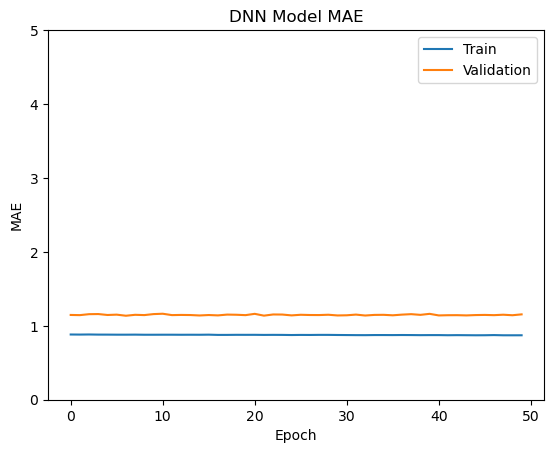

In [87]:
import matplotlib.pyplot as plt

# plot MAE
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.ylim([0,5])
plt.title('DNN Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# SMAPE: Symmetric mean absolute percentage error (adjusted MAPE)
from sklearn.metrics import explained_variance_score,mean_absolute_error, mean_squared_error, r2_score
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds-target)
    denom = np.abs(preds)+np.abs(target)
    smape_val = (200*np.sum(num/denom))/n
    return smape_val

In [71]:
print("VALID SMAPE:", smape(np.expm1(NN_model.predict(X_val).flatten()), np.expm1(Y_val)))
print("\tExplained variance:", explained_variance_score(Y_val, NN_model.predict(X_val)))
print("\tMean absolute error (MAE):", mean_absolute_error(Y_val, NN_model.predict(X_val)))
print("\tRoot Mean squared error (RMSE):",  np.sqrt(mean_squared_error(Y_val, NN_model.predict(X_val))))
print("\tR2 score:", r2_score(Y_val, NN_model.predict(X_val)))

VALID SMAPE: 90.27421339397435
	Explained variance: -32.67557656107756
	Mean absolute error (MAE): 1.1616256033477366
	Root Mean squared error (RMSE): 8.854389597036624
	R2 score: -32.72028964150148


In [ ]:
train_predictions = NN_model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':np.expm1(train_predictions), 'Actuals':np.expm1(Y_train)})
train_results

In [ ]:
df_final_model= df7.copy()
train = df_final_model.loc[(df_final_model["order_date"] <  "2019-01-01"), :]
Y_train = train['ord_qty']
X_train = train[cols]

test = df_final_model.loc[(df_final_model["order_date"] >=  "2019-01-01"), :]
X_test = test[cols]

In [ ]:
df_final_model

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
test_predictions = NN_model.predict(X_test).flatten()

In [ ]:
test_results = pd.DataFrame(data={'Test Predictions':np.expm1(test_predictions)})
test_results

In [ ]:
submission_df = test.loc[:, ['id', 'ord_qty']]
submission_df['ord_qty'] = np.expm1(test_predictions)
submission_df['id'] = submission_df.id.astype(int)
submission_df.head()

In [ ]:
submission_df.to_csv('submission_DNN.csv', index=False)